# PROJECT MODEL FITNESS

## Introduccion 

Model Fitness, una reconocida cadena de gimnasios, ha emprendido un proceso de transformación digital con el fin de analizar el comportamiento de sus clientes y desarrollar una estrategia de retención basada en datos historicos de cada uno de los clientes con la finalidad de identificar patrones de comportamiento que permitan predecir la probabilidad de que un cliente abandone el gimnasio teniendo en cuenta el modelo de negocio, en consecuencia, implementar acciones preventivas para mejorar la retención.


## Objetivos 
El proyecto se enfocara en los siguientes objetivos:

- Predecir la probabilidad de cancelación de membresías para el mes siguiente mediante modelos de machine learning.

- Identificar patrones de comportamiento y segmentos de usuarios que permitan entender mejor las causas de la pérdida.

- Determinar los factores clave que influyen en la cancelación.

- Diseñar recomendaciones estratégicas para mejorar la interacción con los clientes y reducir la rotación.

A partir de los datos proporcionados por Model Fitness, que incluyen información demográfica, uso de servicios, historial de visitas y comportamiento contractual, se desarrollará un enfoque analítico integral. 

El objetivo final es construir modelos predictivos y perfiles de clientes que guíen las acciones de marketing y fidelización del gimnasio.

## Descripción del Dataset
El dataset proporcionado por Model Fitness contiene información detallada sobre los clientes, A continuación se describen las principales características del dataset:

 - `gender`: Género del cliente (masculino, femenino).
 - `Near_Location`: si el/la usuario/a vive o trabaja en el vecindario donde se encuentra el gimnasio.
 - `Partner`: si el/la usuario/a trabaja en una compañía asociada (el gimnasio tiene empresas asociadas cuyos empleados obtienen descuentos; en esos casos el gimnasio almacena información sobre los empleadores de los clientes).
 - `Promo_friends`: si el/la usuario/a originalmente se inscribió mediante una oferta “trae a un/a amigo/a” (se utilizó el código promocional de un/a amigo/a cuando pagaron el primer abono).
 - `Phone`: si el/la usuario/a proporcionó un número de teléfono al momento de inscribirse.
 - `Age`: Edad del cliente.
 - `Lifetime`: Tiempo que el cliente ha estado inscrito en el gimnasio (en meses).
 - `Contract_period`: Tipo de contrato del cliente (1 mes, 3 meses, 6 meses o 1 año.).
 - `Month_to_end_contract`: Meses restantes hasta el final del contrato.
 - `Group_visits`: si el/la usuario/a participa en visitas grupales.
 - `Avg_class_frequency_total`:frecuencia media de visitas por semana a lo largo de la vida del cliente.
 - `Avg_class_frequency_current_month`: frecuencia media de visitas por semana durante el mes en curso
 - `Avg_additional_charges_total`: cantidad total de dinero gastado en otros servicios del gimnasio: cafetería, productos deportivos, cosméticos, masajes, etc.
 - `Churn`: si el/la usuario/a canceló su membresía en el mes siguiente (1) o no (0).


In [971]:
# Cargar librerrias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score


In [972]:
# Cargar el dataset
data=pd.read_csv('gym_churn_us.csv', sep=',')

print(data.shape)
print(data.head())

(4000, 14)
   gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   

   Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
0             1   29                     14.227470                    5.0   
1             1   31                    113.202938                   12.0   
2             0   28                    129.448479                    1.0   
3             1   33                     62.669863                   12.0   
4             0   26                    198.362265                    1.0   

   Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_m

# Analisis Exploratorio de Datos (EDA)

De acuerdo con la descripción del dataset, se realizará un análisis exploratorio de los datos (EDA) para comprender mejor las características del dataset y detectar patrones relevantes asi mismo como la calidad de los datos.


In [973]:
data.info()

data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


## Analisis preliminar de los datos

De acuerdo a la informacion del dataset, y a la estadistica descriptiva de manera preliminar podemos observar que:

- Hay proporción casi igual entre hombres y mujeres teniendo en cuenta la media de ``0.51``.

- Aproximadamente el ``85%`` de los clientes viven o trabajan cerca del gimnasio.

- Aproximadamente el ``49%`` de los clientes trabajan en una empresa asociada al gimnasio (Esto se traduce en descuentos para los empleados de esas empresas).
- Solo el ``31%`` se unió con promoción de amigos.

- Aproximadamente el ``90%`` de los clientes proporcionaron un número de teléfono al momento de inscribirse.


### Divison de los datos por Churn

In [974]:
# Division de los datos por Churn 

data_churn= data.groupby('Churn').mean()

churn_0 = data[data['Churn'] == 0].count()
churn_1 = data[data['Churn'] == 1].count()
print("Cantidad de clientes que se quedaron (Churn = 0):", churn_0['Churn'])
print("Cantidad de clientes que se fueron (Churn = 1):", churn_1['Churn'])

print(data_churn.T)


Cantidad de clientes que se quedaron (Churn = 0): 2939
Cantidad de clientes que se fueron (Churn = 1): 1061
Churn                                       0           1
gender                               0.510037    0.510839
Near_Location                        0.873086    0.768143
Partner                              0.534195    0.355325
Promo_friends                        0.353522    0.183789
Phone                                0.903709    0.902922
Contract_period                      5.747193    1.728558
Group_visits                         0.464103    0.268615
Age                                 29.976523   26.989632
Avg_additional_charges_total       158.445715  115.082899
Month_to_end_contract                5.283089    1.662582
Lifetime                             4.711807    0.990575
Avg_class_frequency_total            2.024876    1.474995
Avg_class_frequency_current_month    2.027882    1.044546


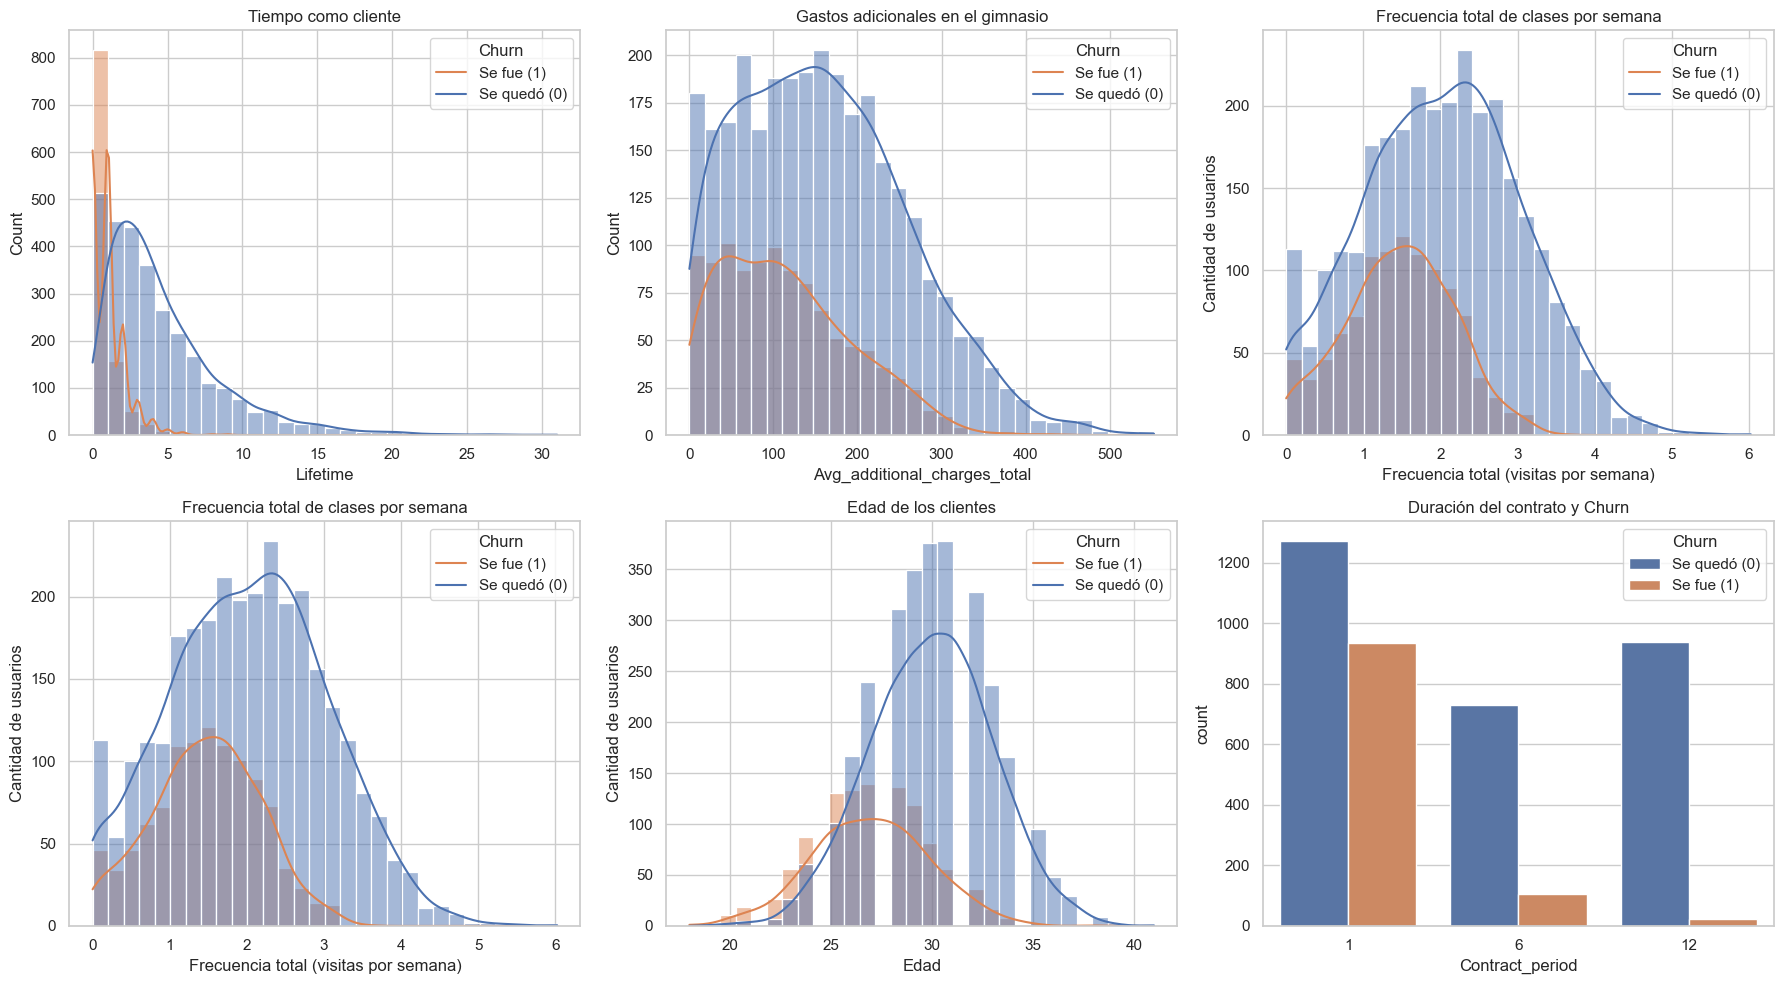

In [975]:

# Establecer estilo
sns.set(style="whitegrid")

fig, axs = plt.subplots(2, 3, figsize=(18, 10))  
axs = axs.ravel()  

# Histograma 1: Tiempo como cliente
sns.histplot(data, x='Lifetime', hue='Churn', kde=True, bins=30, ax=axs[0])
axs[0].set_title('Tiempo como cliente')
axs[0].legend(title='Churn', labels=['Se fue (1)','Se quedó (0)'])

# histograma 2: Gastos adicionales
sns.histplot(data, x='Avg_additional_charges_total', hue='Churn', kde=True, bins=30, ax=axs[1])
axs[1].set_title('Gastos adicionales en el gimnasio')
axs[1].legend(title='Churn', labels=['Se fue (1)','Se quedó (0)'])

# histograma 3: Frecuencia total de clases por semana
sns.histplot(data, x='Avg_class_frequency_total', hue='Churn', kde=True, bins=30, ax=axs[2])
axs[2].set_title('Frecuencia total de clases por semana')
axs[2].set_xlabel('Frecuencia total (visitas por semana)')
axs[2].set_ylabel('Cantidad de usuarios')
axs[2].legend(title='Churn', labels=['Se fue (1)','Se quedó (0)'])


sns.histplot(data, x='Avg_class_frequency_total', hue='Churn', kde=True, bins=30, ax=axs[3])
axs[3].set_title('Frecuencia total de clases por semana')
axs[3].set_xlabel('Frecuencia total (visitas por semana)')
axs[3].set_ylabel('Cantidad de usuarios')
axs[3].legend(title='Churn', labels=['Se fue (1)','Se quedó (0)'])


# histograma 4: Edad de los clientes
sns.histplot(data, x='Age', hue='Churn', kde=True, bins=30, ax=axs[4])
axs[4].set_title('Edad de los clientes')
axs[4].set_xlabel('Edad')
axs[4].set_ylabel('Cantidad de usuarios')
axs[4].legend(title='Churn', labels=['Se fue (1)','Se quedó (0)'])

# Gráfico 5: Duración del contrato
sns.countplot(data=data, x='Contract_period', hue='Churn', ax=axs[5])
axs[5].set_title('Duración del contrato y Churn')
axs[5].legend(title='Churn', labels=['Se quedó (0)', 'Se fue (1)'])



# Ajustar espaciado
plt.tight_layout()
plt.show()


## Analisis de la distribucion de los datos por Churn

De acuerdo a la distribucion de los datos por Churn, podemos observar que la mayoria de los histogramas muestran una tendencia a que los clientes que se quedan (0) tienen una mayor frecuencia de visitas, menor gasto adicional y una mayor duración del contrato en comparación con los clientes que se van (1),dicho de otra manera:    

- Para la frecuencia de visitas, los clientes que se quedan suele visitar el gimnasio mas de 3 veces por semana, mientras que los clientes que se van tienden a visitar el gimnasio menos de  veces por semana.
- En cuanto al gasto adicional, los clientes que se quedan tienden a gastar mas en servicios adicionales del gimnasio, mientras que los clientes que se van tienden a gastar menos en estos servicios.
- En cuanto a la edad, los clientes que se quedan tienden a ser mas jovenes que los clientes que se van, lo que indica que el gimnasio puede estar perdiendo clientes mas jovenes.
- En cuanto a la duración del contrato, los clientes que se quedan tienden a tener contratos mas largos, mientras que los clientes que se van tienden a tener contratos mas cortos. 

si bien la mayoria de los histogrimas muestran las tendencias de claras de las personas que se van y las que se quedan, es importante tener en cuenta que la distribucion de los datos por`` Churn`` no es completamente equilibrada, lo que puede afectar la capacidad del modelo para predecir correctamente el Churn. 

## Matriz de correlación
A continuación se muestra la matriz de correlación entre las variables del dataset. Esta matriz nos permite identificar las relaciones entre las variables y detectar posibles patrones de comportamiento.

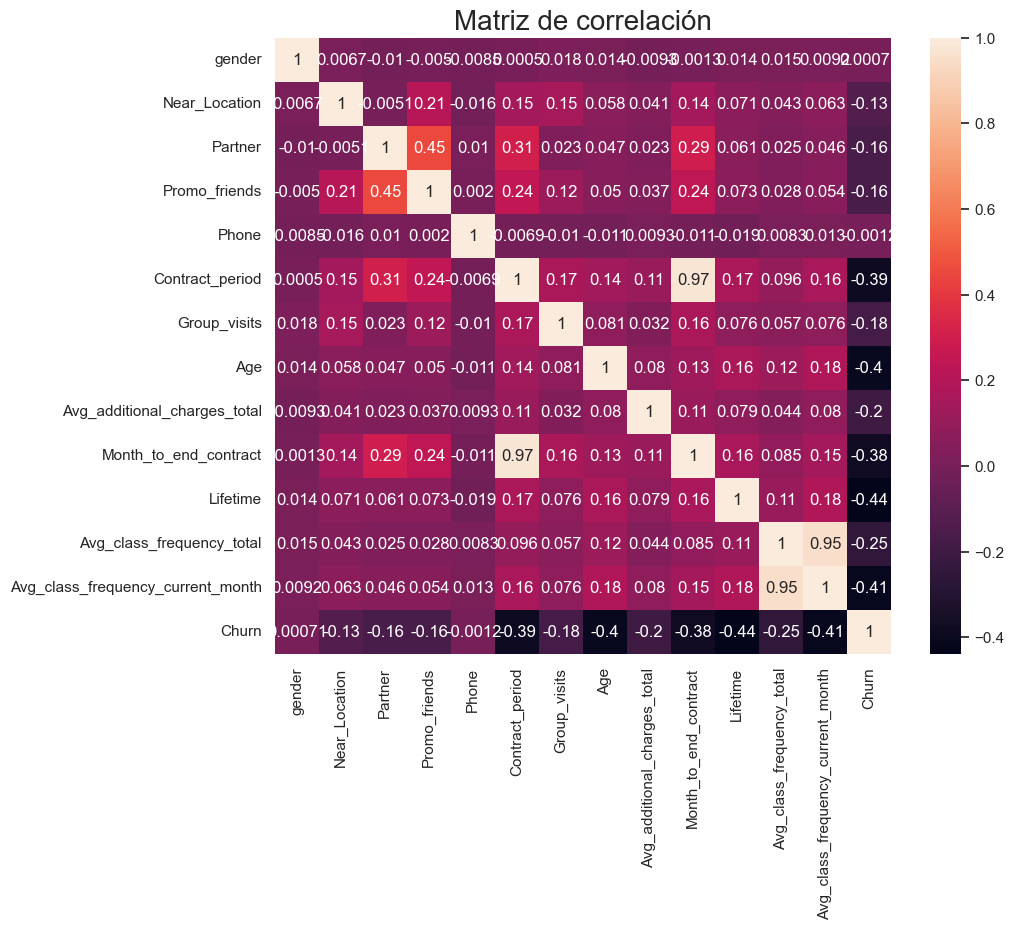

In [976]:
# Matriz de correlación
cm= data.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cm, annot=True, square=True)
ax.set_title('Matriz de correlación', fontsize=20)
plt.show()



### Analisis de la matriz de correlación
La matriz de correlación muestra las relaciones entre las variables del dataset. Algunas observaciones clave son:
 
 - Lifetime: -0.44:
⇒Clientes que llevan más tiempo tienen menos probabilidad de abandonar.

 - Avg_class_frequency_current_month: -0.41
⇒ Menor frecuencia de clases en el último mes se asocia a mayor abandono.

 - Contract_period: -0.39
⇒ Contratos más largos se relacionan con menor abandono.

 - Month_to_end_contract: -0.38
⇒ Clientes cerca de terminar contrato tienden a abandonar más.

 - Avg_class_frequency_total: -0.25
⇒ Menor frecuencia total de clases también se asocia al abandono.

Mas sin embargo al observar la matriz de correlación, se puede notar que no hay una correlación muy fuerte entre las variables y el Churn, lo que indica que el modelo de machine learning deberá considerar múltiples variables para predecir el Churn de manera efectiva.

## Construccion de un modelo para predecir la cancelación de usuarios

Para construir un modelo que prediga la probabilidad de cancelación de usuarios, se utilizará un enfoque de machine learning, teniendo la premisa de que la construccion se basara en un modelo de clasificacion binaria, dado que el objetivo es predecir si un cliente se quedará (0) o se irá (1).

Se establecerá un pipeline de machine learning que incluya los siguientes pasos:

- División de los datos en conjuntos de entrenamiento y prueba.
- Preprocesamiento de los datos (codificación de variables categóricas, normalización, etc).
- Entrenamiento de los modelos de clasificación regresión logística, random forest.
- Evaluación de los modelos utilizando métricas como precisión, recall, F1-score y ROC-AUC.


In [977]:
# Definicion de variable a predecir
X= data.drop(columns=['Churn'], axis=1)
y= data['Churn']

# Division de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# standardizar los datos

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Función para imprimir resultados

def print_all_metric(y_true, y_pred, y_prob, title=''):
    print(f"Resultados para {title}:")
    print('\t- Accuracy: {:.3f}'.format(accuracy_score(y_true, y_pred)))
    print('\t- Precision:{:.3f}'.format( precision_score(y_true, y_pred)))
    print('\t- Recall:{:.3f}'.format(recall_score(y_true,y_pred)))
    print('\t- F1 Score:{:.3f}'.format(f1_score(y_true, y_pred)))
    print('\t- ROC AUC:{:.3f}'.format(roc_auc_score(y_true,y_prob)))
    
    
    
    
# Entrenar modelo de regresión logica

lr_model= LogisticRegression(random_state=0)
lr_model.fit(X_train_scaled,y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
y_prob_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

print_all_metric(y_test, y_pred_lr, y_prob_lr, title='Regresión Logística') 


# Entrenar modelo de bosque aleatorio
rf_model= RandomForestClassifier(random_state=0)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf= rf_model.predict(X_test_scaled)
y_prob_rf= rf_model.predict_proba(X_test_scaled)[:,1]

print('\n' )
print_all_metric(y_test, y_pred_rf, y_prob_rf, title='Bosque Aleatorio') 


Resultados para Regresión Logística:
	- Accuracy: 0.922
	- Precision:0.854
	- Recall:0.828
	- F1 Score:0.841
	- ROC AUC:0.971


Resultados para Bosque Aleatorio:
	- Accuracy: 0.915
	- Precision:0.839
	- Recall:0.813
	- F1 Score:0.826
	- ROC AUC:0.968


## Conclusiones preliminares: 

Al cabo del entrenamiento de los modelos y a su vez la evaluacion de su calidad se puede decir que:

``Regresión Logística``
- Accuracy: 92.2% → Muy alta. El modelo acierta en más del 92% de los casos.

- Precision: 85.4% → De cada 100 clientes que el modelo dice que se van, ~85 realmente se van.

- Recall: 82.8% → De cada 100 clientes que realmente se fueron, el modelo detecta a ~83.

- F1 Score: 84.1% → Buen equilibrio entre precisión y recall.

- ROC AUC: 0.971 → Excelente capacidad de separación. Casi perfecto.

``Bosque Aleatorio``
- Accuracy: 91.5% → Muy buena, pero ligeramente menor que la regresión logística.

- Precision: 83.9% → Un poco menor que el modelo anterior.

- Recall: 81.3% → También algo más bajo.

- F1 Score: 82.6% → Buen resultado, pero más bajo que la regresión logística.

- ROC AUC: 0.968 → Excelente también, aunque un poco menor.

**Ambos modelos se desempeñan muy bien, pero:**

``La regresión logística fue ligeramente superior en todas las métricas.``

Además, es más interpretable, lo que puede ser útil para justificar las decisiones ante el equipo de negocio.

El bosque aleatorio puede ser más robusto en algunos casos y modela relaciones no lineales, pero el conjunto de datos y sus caracteristicas , la regresión logística parece ser la mejor opción actualmente.

## Clusteres de Usuarios
Para identificar patrones de comportamiento y segmentar a los usuarios, se utilizará un algoritmo de clustering como K-means. Este algoritmo agrupará a los clientes en función de sus características, permitiendo identificar segmentos con comportamientos similares.

Para esta tarea se va a suprimir la variable Churn, ya que no es relevante para el clustering, y se utilizarán las variables restantes para crear los clusters.

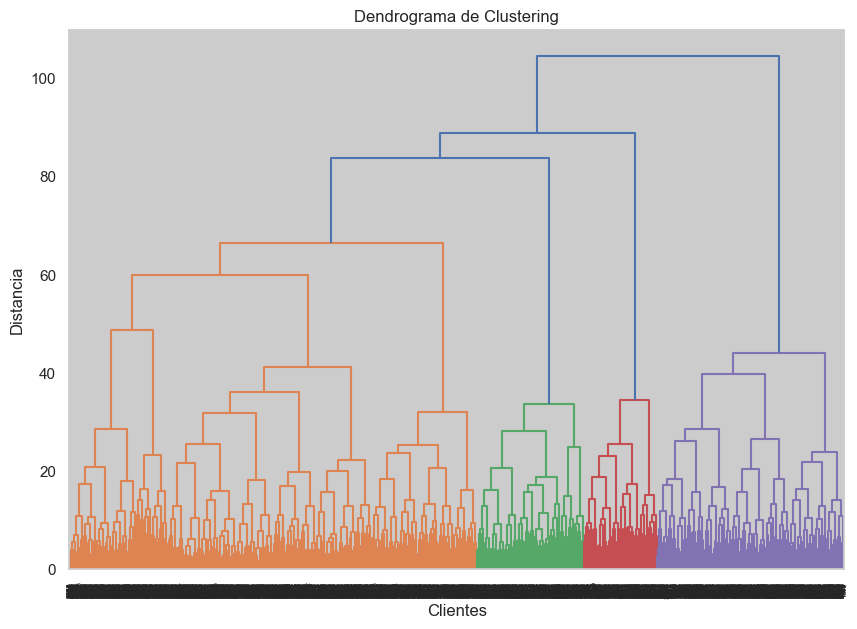

In [978]:

# Standardizar los datos para el clustering
scaler = StandardScaler()
X_sc= scaler.fit_transform(X)

linked= linkage(X_sc, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrograma de Clustering')
plt.xlabel('Clientes')
plt.ylabel('Distancia')
plt.show()

In [979]:
# Definicion del modelo K-means

km= KMeans(n_clusters=5, random_state=0)

labels= km.fit_predict(X_sc)

data['Cluster'] = labels


print(data.sample(10))



      gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
3774       0              1        1              0      1               12   
2964       1              1        0              0      1                6   
467        1              1        1              1      1               12   
3576       0              1        1              1      1                1   
401        0              0        1              0      1                1   
1563       1              1        1              0      1                1   
3149       1              1        1              0      0               12   
3637       0              1        1              1      1                1   
1626       0              1        0              0      1                1   
2621       1              1        1              0      1                6   

      Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
3774             0   32                      7.231

In [980]:
# Valores medios de los clusters

cluster_means = data.groupby('Cluster').mean()
print("\nValores medios de los clusters:")
print(cluster_means)


Valores medios de los clusters:
           gender  Near_Location   Partner  Promo_friends     Phone  \
Cluster                                                               
0        0.486819       1.000000  0.243409       0.007030  0.899824   
1        0.592493       0.970509  0.288204       0.123324  0.898123   
2        0.499469       0.943677  0.740701       0.489904  0.900106   
3        0.483360       1.000000  0.798732       1.000000  0.911252   
4        0.496324       0.000000  0.466912       0.077206  0.915441   

         Contract_period  Group_visits        Age  \
Cluster                                             
0               1.978910      0.326889  28.239016   
1               2.898123      0.482574  30.339142   
2              11.866100      0.551541  29.905420   
3               3.079239      0.445325  29.052298   
4               2.209559      0.215074  28.483456   

         Avg_additional_charges_total  Month_to_end_contract  Lifetime  \
Cluster                

In [981]:
# Distribución de los clusters

# Función para graficar la distribución de los clusters
def clusters_plot(data,x_name,y_name, cluster_name):
    plt.Figure(figsize=(10, 10))
    sns.scatterplot(data=data, x=x_name, y=y_name, hue=cluster_name, palette='viridis')
    plt.title(f'Distribución de los clusters por {x_name} y {y_name}')
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.show()


print('Silhouette_score: {:.2f}'.format(silhouette_score(X_sc,labels)))



Silhouette_score: 0.13


## Analisis Score Silhouette
El score silhouette es una métrica que evalúa la calidad de los clusters formados por el algoritmo K-means. Un score silhouette cercano a 1 indica que los puntos están bien agrupados, mientras que un score cercano a -1 indica que los puntos están mal agrupados.

Para este caso, se ha obtenido un score silhouette de ``0.11``, lo que indica que los clusters formados son aceptables, pero hay margen de mejora. Esto sugiere que los clientes no están tan bien agrupados como se esperaba, lo que podría deberse a la complejidad del comportamiento de los clientes o a la necesidad de más variables para el clustering esto se reflejara en los comportamientos de los graficos.

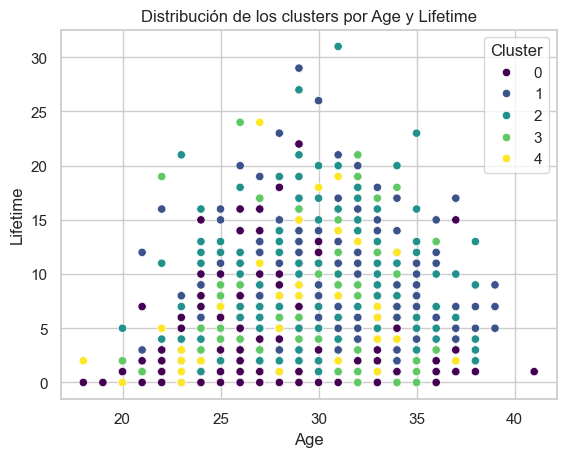

In [982]:
# Grafico de la distribución de los clusters
clusters_plot(data,'Age','Lifetime','Cluster')

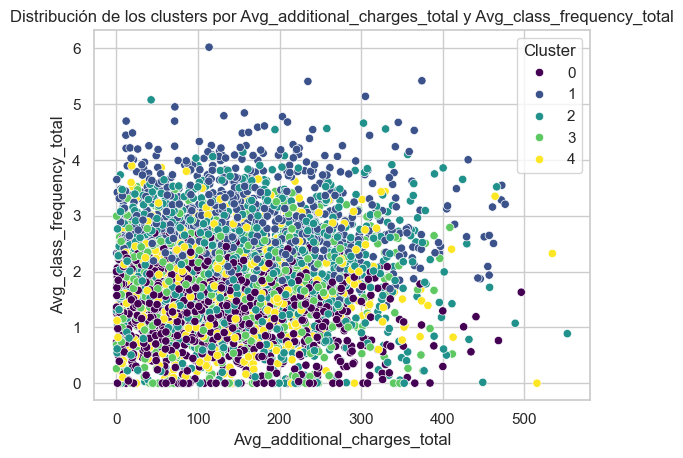

In [983]:
clusters_plot(data,'Avg_additional_charges_total','Avg_class_frequency_total','Cluster')    

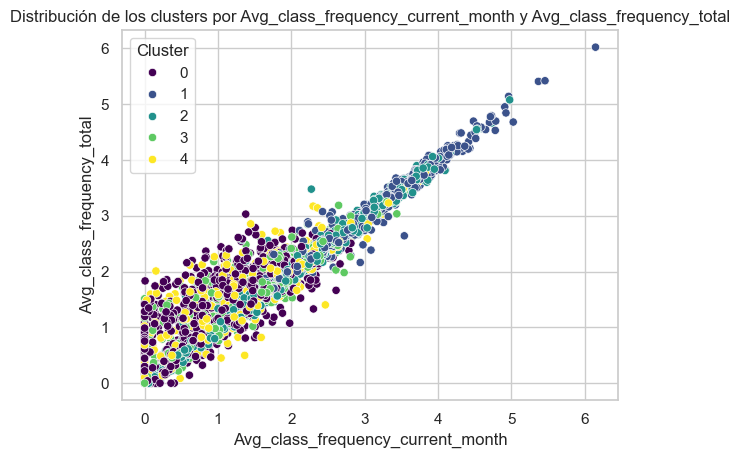

In [984]:
clusters_plot(data,'Avg_class_frequency_current_month','Avg_class_frequency_total','Cluster')

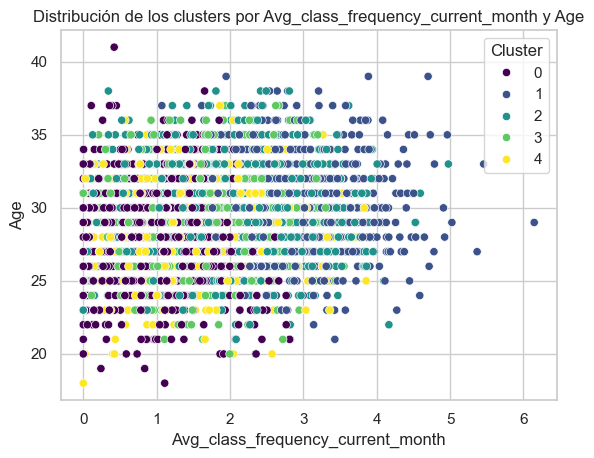

In [985]:
clusters_plot(data,'Avg_class_frequency_current_month','Age','Cluster')

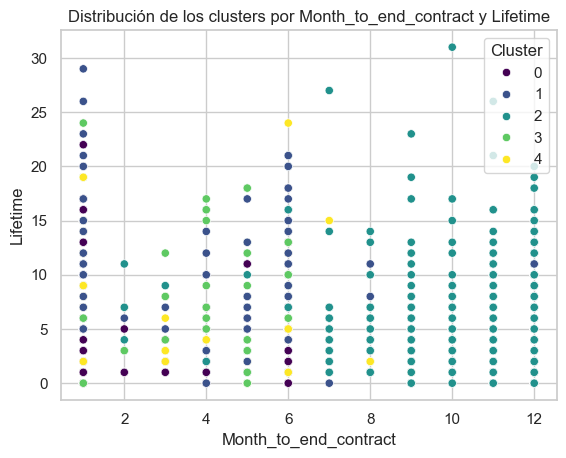

In [986]:
clusters_plot(data,'Month_to_end_contract','Lifetime','Cluster')

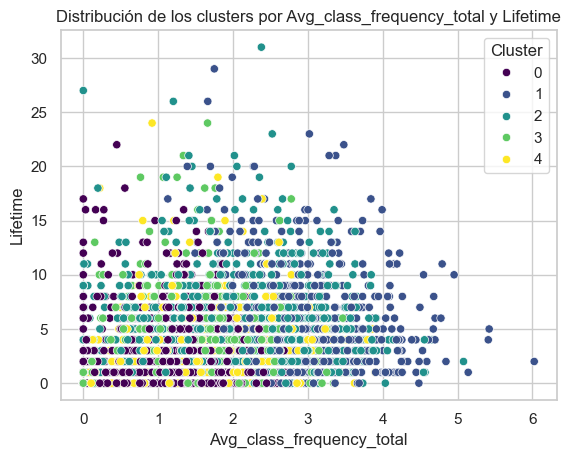

In [987]:
clusters_plot(data,'Avg_class_frequency_total','Lifetime','Cluster')

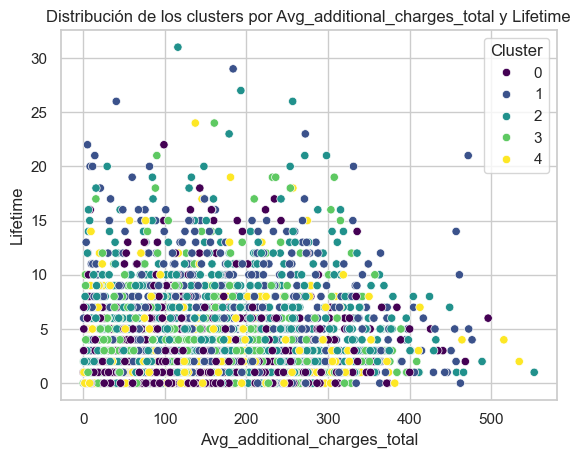

In [988]:
clusters_plot(data,'Avg_additional_charges_total','Lifetime','Cluster')

In [989]:
# Calculo de la tasa de cancelación para cada clúster

cancelation_rate = data.groupby('Cluster')['Churn'].mean() * 100
print("\nTasa de cancelación por clúster:") 
print(cancelation_rate.sort_values(ascending=False))


Tasa de cancelación por clúster:
Cluster
0    51.318102
4    45.036765
3    26.941363
1     5.495979
2     2.231668
Name: Churn, dtype: float64


## Analisis de los clusters y Conclusiones

Tras la creación de los clústeres y el análisis de las características clave de los clientes junto con datos históricos, se lograron identificar los grupos más relevantes en términos de cancelación. A continuación, se presentan los clústeres ordenados desde los más propensos a abandonar el servicio hasta los más leales: 

- **Cluster 0**:–` Alta tasa de cancelación (~51%)`
    Perfil del usuario:

    - vive cerca del gimnasio.

    - No pertenece a empresa asociada.

    - No llegó por promoción.

    - Contrato corto (~1.9 meses promedio).

    - Poca participación en clases grupales (~0.33).

    - Edad joven (~28 años).

    - Baja frecuencia de visitas (~1.17 visitas/semana).

    - Menor tiempo como cliente (~2.5 meses).

- **Conclusión**: 
 Se trata de usuarios con bajo compromiso y escasa conexión con el gimnasio. A pesar de ser un grupo joven y encontrarse cerca, no cuentan con incentivos suficientes que los motiven a continuar. Su falta de participación en programas, promociones o beneficios adicionales los hace altamente propensos a abandonar el servicio, posiblemente en busca de opciones más atractivas.
 Es probable que muchos se inscriban por curiosidad o por una oferta puntual, pero al no percibir un valor sostenido, deciden no renovar. Esto indica la necesidad de que la empresa fortalezca la experiencia de estos clientes, ofreciendo promociones específicas, descuentos personalizados o beneficios exclusivos que fomenten su fidelización y compromiso a largo plazo.


- **Cluster 4**:–` Alta tasa de cancelación (~45%)`
    Perfil del usuario:

    - No vive cerca del gimnasio.

    - Moderado uso de beneficios de socio (~46%).

    - No usó promociones (~ 7%)

    - Contrato corto (~2.2 meses promedio).

    - Baja participación grupal (~0.21).

    - Tiempo como cliente bajo (~2.8 meses).

    - Frecuencia de visitas algo mayor (~1.46/semana).

    - Menor tiempo como cliente (~2.8 meses).
- **Conclusión**:
 Este grupo representa a usuarios que, aunque no viven cerca, han mostrado cierto interés inicial al inscribirse. Sin embargo, su baja participación en actividades grupales y el uso limitado de beneficios indican una falta de conexión con el gimnasio. La corta duración de sus contratos y la baja frecuencia de visitas sugieren que estos clientes no encuentran suficiente valor en la oferta actual.
 Es probable que muchos se inscriban con expectativas altas, pero al no sentirse parte de una comunidad activa o no aprovechar al máximo los servicios, deciden cancelar. Para retener a este grupo, sería recomendable implementar estrategias de engagement más efectivas, como promociones específicas para nuevos usuarios, eventos sociales o clases introductorias que fomenten una mayor integración y uso de las instalaciones.

- **Cluster 3**:–` Tasa de cancelación moderada (~27%)`
    Perfil del usuario:

    - Vive cerca y trabaja en empresa asociada (~87%).

    - Alto uso de promociones (~63%)

    - Contrato corto (~3 meses promedio).

    - Frecuencia de visitas moderada (1.2 visitas/semana).

    - Tiempo como cliente: 3 meses.
- **Conclusión**:
    Este grupo representa a usuarios que, aunque viven cerca y tienen acceso a beneficios de empresa asociada, muestran una tasa de cancelación moderada. Su alta utilización de promociones sugiere que están motivados por ofertas iniciales, pero su baja frecuencia de visitas indica que no están completamente comprometidos con el gimnasio.
    Es probable que muchos se inscriban atraídos por las promociones, pero al no encontrar un valor sostenido o una comunidad activa, deciden cancelar. Para mejorar la retención en este grupo, sería recomendable ofrecer incentivos adicionales para aumentar la frecuencia de visitas, como descuentos por asistencia regular o programas de fidelización que recompensen la participación activa.

- **Cluster 1**:–` Tasa de cancelación baja (~6%)`
    Perfil del usuario:

    - Viven cerca (97%) y muchos son socios (~35%).

    - Alto uso de promociones (~70%).

    - Contrato largo (~3 meses promedio).

    - Alta participación grupal (~0.8).

    - Frecuencia de visitas alta (~3 visitas/semana).

    - Tiempo como cliente: 6 meses.
    
    - Gastan mucho en servicios adicionales (164)

- **Conclusión**:
    Este grupo representa a usuarios altamente comprometidos que aprovechan al máximo los beneficios del gimnasio. Su alta participación en actividades grupales y el uso de promociones indican una conexión sólida con la comunidad del gimnasio. Además, su frecuencia de visitas y el gasto en servicios adicionales reflejan un compromiso significativo.
    Es probable que muchos de estos clientes se sientan parte de una comunidad activa y valoren la experiencia general del gimnasio. Para mantener su lealtad, sería recomendable seguir ofreciendo beneficios exclusivos, eventos especiales y programas de fidelización que refuercen su conexión con el gimnasio y fomenten un sentido de pertenencia, de estos mismos replicar estrategias para los demas grupos viendo la necesidad de estos.

- **Cluster 2**:–` Tasa de cancelación baja (~2%)`
    Perfil del usuario:

    - Casi todos viven cerca y trabajan en empresas asociadas (74.6%).

    - Contratos largos (11.7 meses).

    - Alta participación grupal (~0.8).

    - Frecuencia de visitas alta (~3.2 visitas/semana).
    
    - Tiempo como cliente: 11 meses.

    - Gastan mucho en servicios adicionales 
    
- **Conclusión**:
    Este grupo representa a usuarios extremadamente leales y comprometidos con el gimnasio. Su alta participación en actividades grupales, la frecuencia de visitas y el gasto en servicios adicionales reflejan una conexión sólida con la comunidad del gimnasio. Además, su larga duración como clientes indica que han encontrado un valor sostenido en la oferta del gimnasio.
    Es probable que muchos de estos clientes se sientan parte integral de la comunidad del gimnasio y valoren la experiencia general. Para mantener su lealtad, sería recomendable seguir ofreciendo beneficios exclusivos, eventos especiales y programas de fidelización que refuercen su conexión con el gimnasio y fomenten un sentido de pertenencia. Además, se podrían considerar estrategias para incentivar a estos clientes a referir a nuevos usuarios, aprovechando su alta satisfacción y compromiso.
 